In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# nicer defaults
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.grid"] = False

# load data
titanic = sns.load_dataset("titanic")
# light tidy: cast categories, drop obvisous junk columns if needed
cat_cols = ["sex", "class", "embark_town", "who", "adult_male", "alive", "alone", "deck", "embarked"]
for c in cat_cols:
    if c in titanic.columns:
        titanic[c] = titanic[c].astype("category")

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/var/folders/hd/wvpfmg893d9ff7g872_k6hvh0000gn/T/ipykernel_74073/1999767839.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic.groupby("class")["survived"].mean().sort_values(ascending=False)


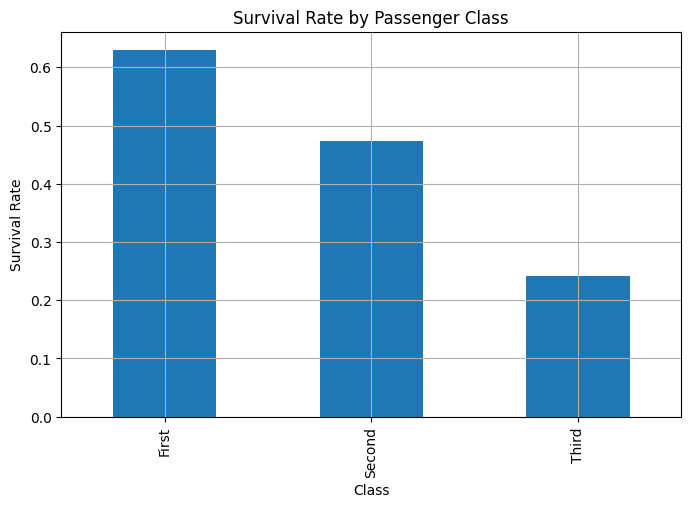

In [4]:
survival_by_class = titanic.groupby("class")["survived"].mean().sort_values(ascending=False)
ax = survival_by_class.plot(kind="bar")
ax.set_title("Survival Rate by Passenger Class")
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Class")
plt.show()

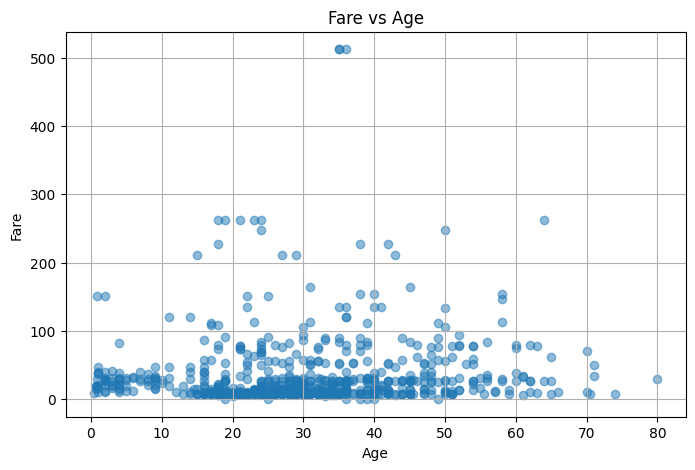

In [11]:
df = titanic.dropna(subset=["age", "fare"])
plt.scatter(df["age"], df["fare"], alpha=0.5)
plt.title("Fare vs Age")
plt.xlabel("Age")
plt.ylabel("Fare")
# plt.ylim(0,600)
plt.show()


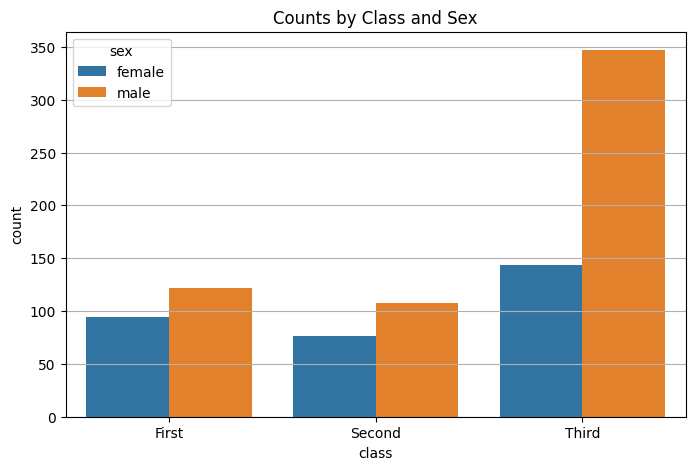

In [14]:
sns.countplot(data=titanic, x="class", hue="sex")
plt.title("Counts by Class and Sex")
plt.show()

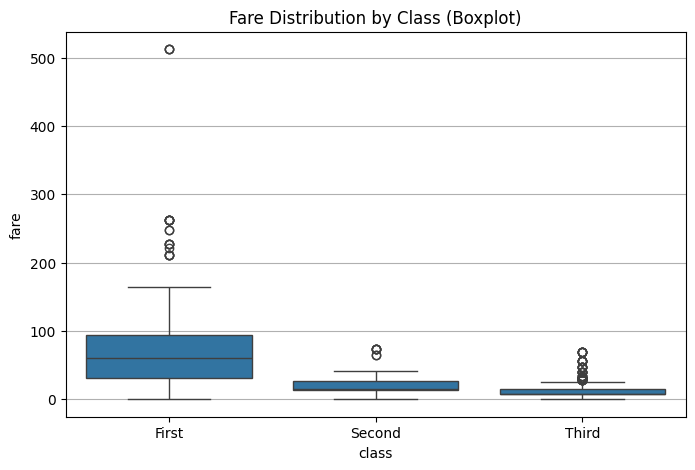

In [ ]:
sns.boxplot(data=titanic, x="class", y="fare")
plt.title("Fare Distribution by Class (Boxplot)")
plt.ylim(0,400)
plt.show()

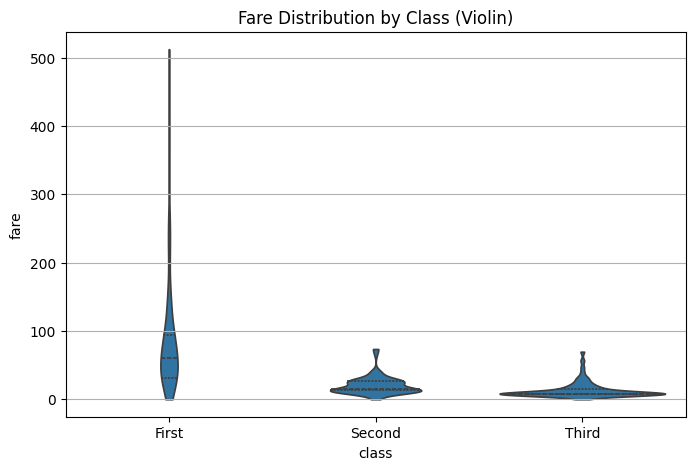

In [ ]:
sns.violinplot(data=titanic, x="class", y="fare", inner="quartile", cut=0)
plt.title("Fare Distribution by Class (Violin)")
plt.ylim(0, 400)
plt.show()

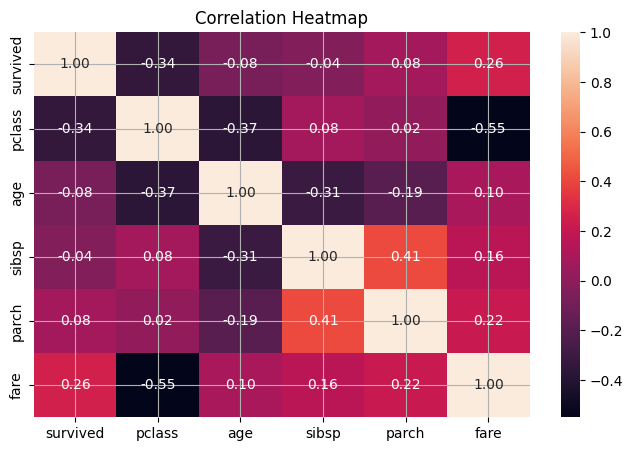

In [17]:
num = titanic.select_dtypes(include=["number"])
sns.heatmap(num.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# So what is each graph good for:

- Countplot: Categorical frequencies
- Boxplot: Summary of distribution (median, spread, outliers)
- Violin plot: Full shape of teh distribution (density)
- Heatmap: matrix of correlations between numeric columns

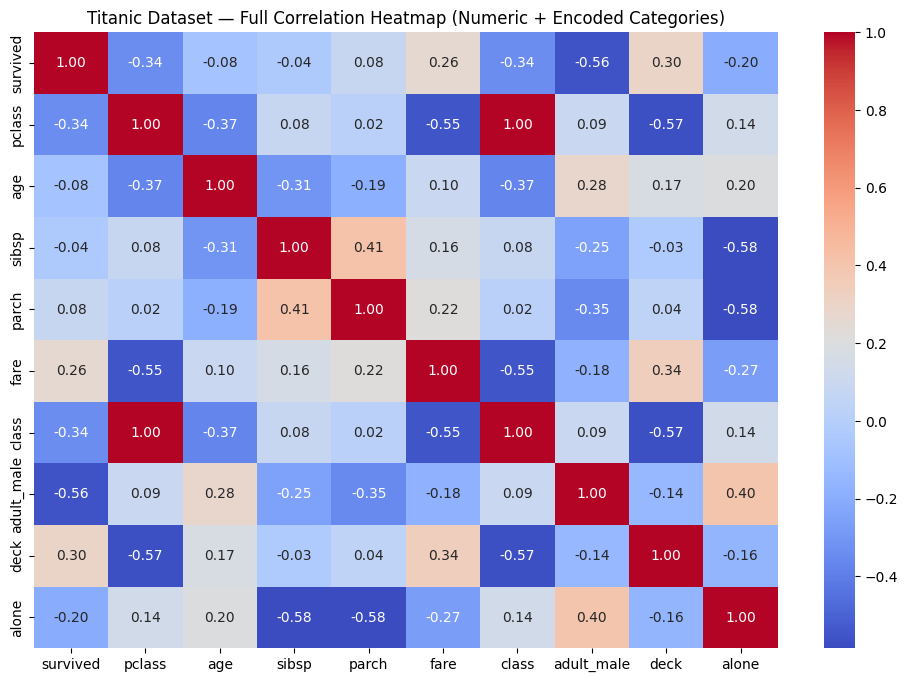

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
titanic = sns.load_dataset("titanic")

# convert categorical columns to codes (0,1,2...)
titanic_encoded = titanic.copy()
for col in titanic_encoded.select_dtypes(include="category").columns:
    titanic_encoded[col] = titanic_encoded[col].cat.codes

corr = titanic_encoded.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Titanic Dataset — Full Correlation Heatmap (Numeric + Encoded Categories)")
plt.show()
